In [ ]:
import io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['iris.data']), header=None)

Saving iris.data to iris (2).data


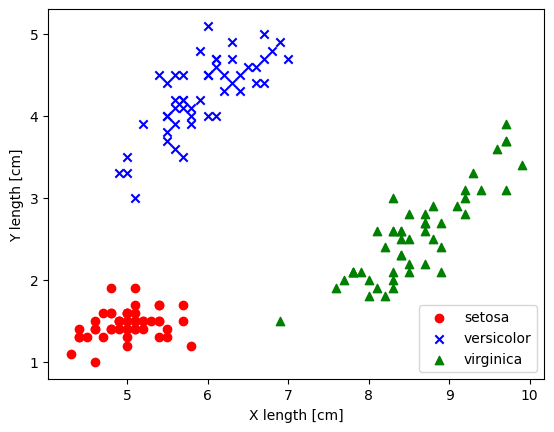

In [ ]:
X_data = df.iloc[0:150, [0, 2]].values # dane wejściowe w przestrzeni dwuwymiarowej
X_data[100:150, :] += [2, -3] # dodaje wartości, aby był liniowo separowalny
Y_data = df.iloc[0:150, 4].values # dane wyjściowe

labels = list(set(Y_data)) # zbieram wszystkie nazwy irysów
label_dict = {label: i for i, label in enumerate(labels)} # numeruję
Y_data_encoded = [label_dict[label] for label in Y_data] # zamiast nazw otrzymuję numery
new_array = [[-1, -1, -1] for _ in range(len(Y_data_encoded))] # dane wyjściowe w formacie [-1 , -1 , -1 ]
for i, y in enumerate(Y_data_encoded):
  new_array[i][y] = 1 # ustawiam jedynki tam, gdzie są potrzebne
Y_data = new_array # zapisuję

setosa_data = X_data[:50]
versicolor_data = X_data[50:100]
virginica_data = X_data[100:150]

plt.scatter(setosa_data[:, 0], setosa_data[:, 1], color='red', marker='o', label='setosa')
plt.scatter(versicolor_data[:, 0], versicolor_data[:, 1], color='blue', marker='x', label='versicolor')
plt.scatter(virginica_data[:, 0], virginica_data[:, 1], color='green', marker='^', label='virginica')

plt.xlabel('X length [cm]')
plt.ylabel('Y length [cm]')
plt.legend(loc='lower right')

In [103]:
print(X_data)
print(Y_data)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [145]:
class Genetics:
    def __init__(self):
        self.elite_percent = 0.1  # Procent najlepszych osobników przechodzących do nowego pokolenia
        self.parent_percent = 0.5  # Procent losowo wybranych par rodziców

    def fit(self, tests, answers, population_size=500, iterations=500):
        self.tests = tests
        self.answers = answers
        self.population_size = population_size
        # Obliczanie rozmiaru chromosomu na podstawie danych wejściowych i wyjściowych
        self.gen_size = len(answers[0]) * len(tests[0]) + len(answers[0])
        self.iterations = iterations
        # Geny dla mutacji w zakresie od -1 do 1 z krokiem 0.02
        # Wybrałem taką dokładność, która jest wystarczająca do poprawnego aktywowania, a jednocześnie niezbyt duża, aby mutacja była skuteczna
        self.possible_genes = np.linspace(-1, 1, num=101)
        # Tworzenie populacji losowo za pomocą losowych genów
        self.population = np.random.choice(self.possible_genes, size=(self.population_size, self.gen_size))

        # Dla wykresu
        best = []
        avg = []

        for iteration in range(self.iterations):
            results = self.selection()
            best.append(np.max(results))
            avg.append(np.mean(results))
            if self.evaluation(self.population[0]) == 1.0:
                break  # Jeżeli najlepszy osobnik osiągnął maksymalny wynik

        plt.plot(best, label='Najlepsze')
        plt.plot(avg, label='Średnie')
        plt.xlabel('Generacja')
        plt.ylabel('Dopasowanie')
        plt.title('Wydajność algorytmu genetycznego')
        plt.legend()
        plt.show()

    def evaluation(self, chromosome):
        # Przekształcanie jednowymiarowej tablicy chromosomu w macierze
        weights = chromosome[:self.gen_size - len(self.answers[0])].reshape(len(self.answers[0]), len(self.tests[0]))
        biases = chromosome[self.gen_size - len(self.answers[0]):].reshape(len(self.answers[0]))
        accuracy = 0
        for i in range(len(self.tests)):
            # Obliczanie wartości neuronów
            activations = np.dot(weights, self.tests[i].reshape(len(self.tests[0]))) + biases
            predictions = np.where(activations >= 0.0, 1, -1)
            # Porównywanie z oczekiwanymi wynikami
            for item, expected in zip(predictions, self.answers[i]):
                if item == expected:
                    accuracy += 1
        # Zwracanie dokładności osobnika
        # Dzielę wszystkie poprawne odpowiedzi przez iloczyn liczby pytań i liczby odpowiedzi w teście,
        # aby uzyskać dokładność w zakresie od 0 do 1 (łatwiej analizować na wykresie)
        return accuracy / (len(self.tests) * len(predictions))

    def selection(self):
        # Pobieranie numerów najlepszych osobników
        evaluations = [self.evaluation(chromosome) for chromosome in self.population]
        sorted_population = np.argsort(evaluations)[::-1]  # Odwracanie tablicy
        self.population = self.population[sorted_population]  # Sortowanie głównej tablicy
        elite_population = self.population[:int(self.population_size * self.elite_percent)]  # Wybieranie najlepszych 10% całej populacji
        new_population = []
        for _ in range(int(self.population_size - len(elite_population))):  # Pozostałe osobniki uzyskiwane przez krzyżowanie
            # Wybieranie rodziców
            parents_id = np.random.choice(int(self.population_size * self.parent_percent), 2, replace=False)
            parent1, parent2 = self.population[parents_id[0]], self.population[parents_id[1]]
            new_element = []
            # Losowe generowanie szansy na mutację i szansy na wybór genu od rodzica
            random_choices = np.random.choice([0, 1, 2], size=self.gen_size, p=[0.1, 0.45, 0.45])
            for i, choice in enumerate(random_choices):
                if choice == 0:
                    gene = np.random.choice(self.possible_genes)
                elif choice == 1:
                    gene = parent1[i]
                else:
                    gene = parent2[i]
                new_element.append(gene)
            new_population.append(new_element)
        self.population = np.concatenate((elite_population, new_population))  # Nowa populacja
        return evaluations

    def predict(self, X):
        # Funkcja działa prawie tak samo jak funkcja evaluation.
        # Zwraca wszystkie predykcje dla najlepszego osobnika
        weights = self.population[0][:self.gen_size - len(self.answers[0])].reshape(len(self.answers[0]), len(self.tests[0]))
        biases = self.population[0][self.gen_size - len(self.answers[0]):].reshape(len(self.answers[0]))
        all_predictions = []
        for i in range(len(X)):
            activations = np.dot(weights, X[i].reshape(len(X[0]))) + biases
            predictions = np.where(activations >= 0.0, 1, -1)
            all_predictions.append(predictions)
        return all_predictions

    def misclassified(self, X, y):
        # Funkcja wyświetla wyniki dla najlepszego osobnika
        weights = self.population[0][:self.gen_size - len(self.answers[0])].reshape(len(self.answers[0]), len(self.tests[0]))
        biases = self.population[0][self.gen_size - len(self.answers[0]):].reshape(len(self.answers[0]))
        global_accuracy = 0
        for i in range(len(X)):
            activations = np.dot(weights, X[i].reshape(len(X[0]))) + biases
            predictions = np.where(activations >= 0.0, 1, -1)
            accuracy = 0
            print(y[i], " -- ", predictions, end="")  # Wyświetlanie dla czytelności
            for item, expected in zip(predictions, y[i]):
                if item == expected:
                    accuracy += 1
            if accuracy != len(self.answers[0]):  # Pokazuje błąd, jeśli jest chociaż jedno niezgodne pytanie
                print(" : ", accuracy, " (BŁĄD) ")
            else:
                print(" : ", accuracy)
            global_accuracy += accuracy / len(predictions)
        # Wyświetlanie dokładności w zakresie od 0 do 1
        return global_accuracy / len(self.tests)


In [146]:
gen = Genetics()
gen.fit(X_data, Y_data)


KeyboardInterrupt: ignored

In [116]:
print(gen.missclassified(X_data,Y_data))

[-0.08 -0.1   0.2  -0.24 -0.32  0.7   0.66 -0.9  -0.34]
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1 -1 -1] :  3
[1, -1, -1]  --  [ 1

In [ ]:
gen.predict(X_data)

[array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1, -1, -1]),
 array([ 1